# <center> Lecture 11 TensorFlow Example and CNN start <center>

This demonstration file focuses on 
   - start of tensor flow
   - MINIST - Hand Writing Recognition Example

You can visit the link below to learn how to apply sklearn neural networks:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

To install tensorflow2, please visit the link: https://www.tensorflow.org/install

The CNN code provided works with tensorflow version 1: https://www.tensorflow.org/install/pip
Alternatively, you also can use keras: https://www.activestate.com/resources/quick-reads/how-to-install-keras-and-tensorflow/


# 1. Tensorflow start and simple NN

In [1]:
#pip install upgrade tensorflow
#pip install tensorflow-datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
2.4.0


## 1. Perceptron using TF

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

The goal of learning is reached


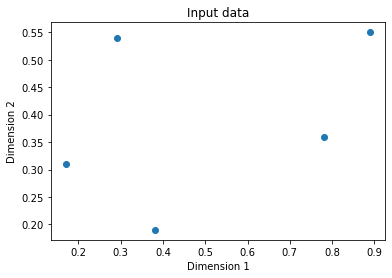

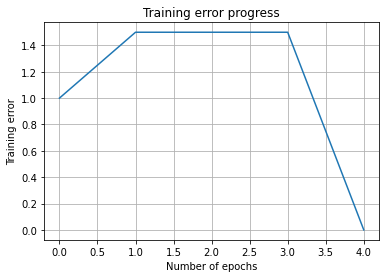

In [4]:
# Load input data 
text = np.loadtxt('data_perceptron.txt')

# Separate datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

# Number of neurons in the output layer
num_output = labels.shape[1]

# Define a perceptron with 2 input neurons (because we 
# have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

# Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

## 2. 2-layer NN Classification

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


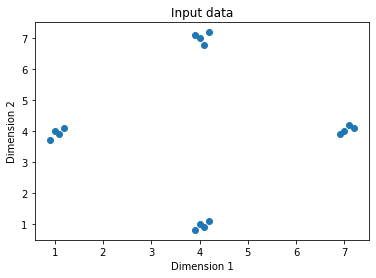

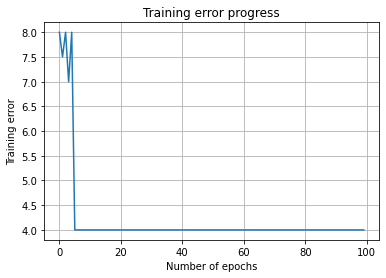


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


In [5]:
#import numpy as np
#import matplotlib.pyplot as plt
#import neurolab as nl

# Load input data
text = np.loadtxt('data_simple_nn.txt')

# Separate it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

# Plot input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Minimum and maximum values for each dimension
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

# Define the number of neurons in the output layer
num_output = labels.shape[1]

# Define a single-layer neural network 
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

# Train the neural network
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

# Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


## 3. 2-layer NN Regression

Epoch: 100; Error: 0.28132138837375215;
The goal of learning is reached


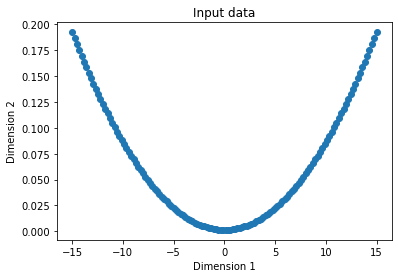

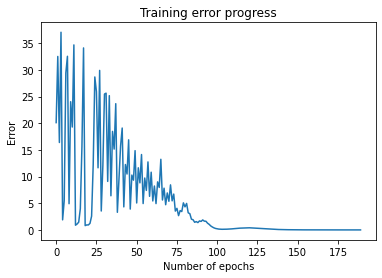

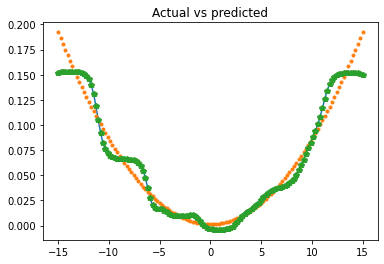

In [6]:
#import numpy as np
#import matplotlib.pyplot as plt
#import neurolab as nl

# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()


In [7]:
# conda install -c conda-forge opencv

## 4. TF Gradient Decent Optimization

In [8]:
#Define the number of points to generate
num_points=1200

In [9]:
#Generate the data based on equation y=mx+c
data=[]
m=0.2
c=0.5
for i in range(num_points):
    #Generate x
    x = np.random.normal(0.0, 0.8)
    #Generate some noise
    noise = np.random.normal(0.0, 0.04)
    # Compute y
    y = m*x + c + noise
    data.append([x, y])

In [10]:
#Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

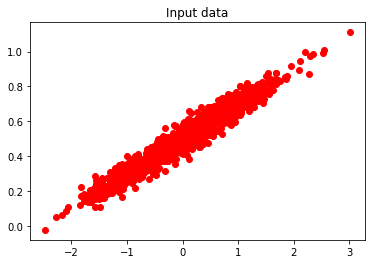

In [11]:
#Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [12]:
#Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b  = tf.Variable(tf.zeros([1]))

In [13]:
#Define equation for y
y=W*x_data + b

In [14]:
#Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

In [15]:
#Define the graident descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [16]:
#Initialize all the variable
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [17]:
#Start the tensorflow session and run ti
sess = tf.Session()
sess.run(init)


IERATION 1
W = -0.123606324
b = 0.49782965
loss = 0.06772731


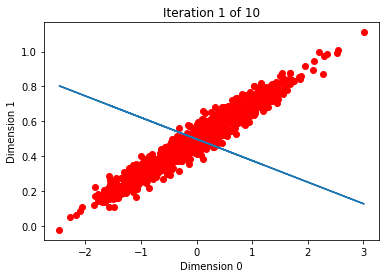


IERATION 2
W = 0.080605656
b = 0.49830812
loss = 0.010664173


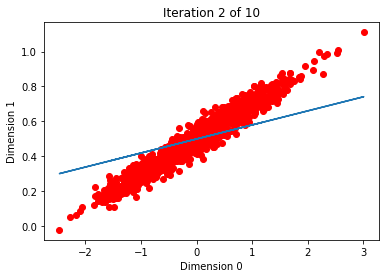


IERATION 3
W = 0.15582305
b = 0.49848476
loss = 0.0029225873


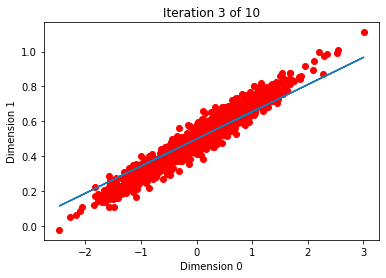


IERATION 4
W = 0.18352789
b = 0.49854982
loss = 0.0018723089


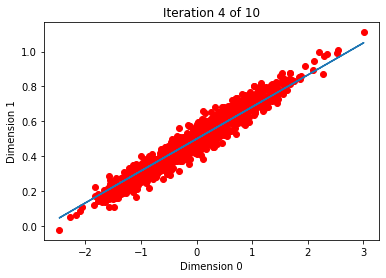


IERATION 5
W = 0.19373241
b = 0.49857378
loss = 0.0017298206


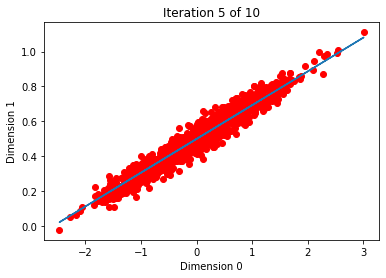


IERATION 6
W = 0.19749105
b = 0.4985826
loss = 0.0017104896


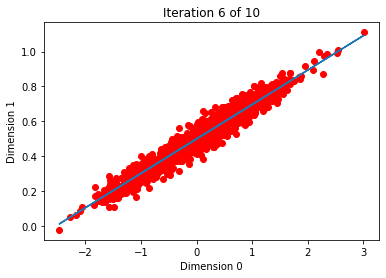


IERATION 7
W = 0.19887547
b = 0.49858585
loss = 0.001707867


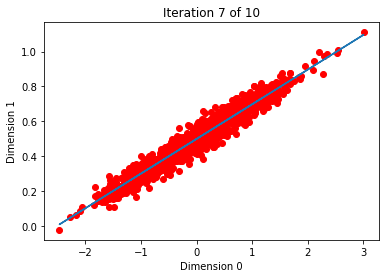


IERATION 8
W = 0.19938539
b = 0.49858704
loss = 0.0017075114


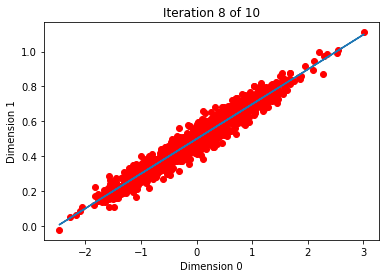


IERATION 9
W = 0.1995732
b = 0.4985875
loss = 0.0017074631


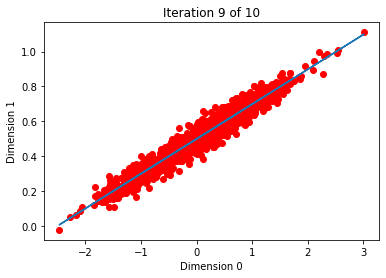


IERATION 10
W = 0.19964239
b = 0.49858767
loss = 0.0017074565


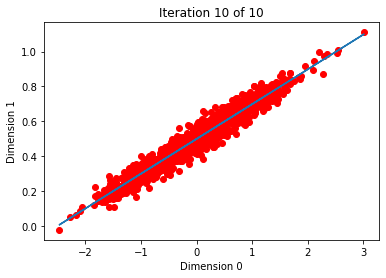

In [18]:
#Start interating
num_iterations = 10
for step in range(num_iterations):
    sess.run(train)
    #Print the progress
    print('\nIERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))
    
    #Plot the input data
    plt.plot(x_data, y_data, 'ro')
    #Plot the predicted output line
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    #Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration '+ str(step+1) + ' of ' +str(num_iterations))
    plt.show()

# Hand Digit Classification Using NN and CNN
### 1. Single layer NN with Stochastic Gradient Descent 

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

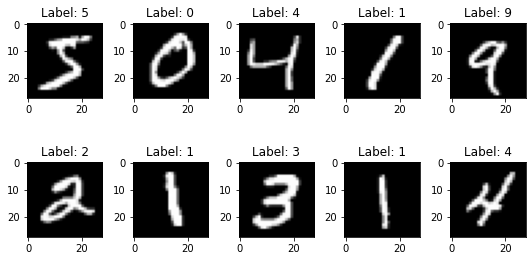

In [20]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

num = 10
images = X_train[:num]
labels = Y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [21]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [23]:
mlp.fit(X_train, Y_train)

Iteration 1, loss = 88770.42594147
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Iteration 5, loss = 94060.03773325
Iteration 6, loss = 94031.82434269
Iteration 7, loss = 94003.61939577
Iteration 8, loss = 93975.42334401
Iteration 9, loss = 93947.23547037
Iteration 10, loss = 93919.05614157


/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [24]:
print(f"Training set score: {mlp.score(X_train, Y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, Y_test):.3f}")

Training set score: 0.112
Test set score: 0.114


In [25]:
X = X / 255.
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [26]:
mlp.fit(X_train, Y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [27]:
print(f"Training set score: {mlp.score(X_train, Y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, Y_test):.3f}")

Training set score: 0.987
Test set score: 0.970


### 2. CNN 
- The codes provided here contains the needed functions that were discussed in lecture note. 
- Then, you can fill up the rest of codes to run. 
- Remember that this is TF1 version. 
- If you use TF2, some functions' names are changed but should work thoroughly if names are correctly changed. 

In [28]:
import pandas as pd

pd.set_option('display.max_columns', None)

df_train = pd.read_csv('./mnist-in-csv/mnist_train.csv')
df_test = pd.read_csv('./mnist-in-csv/mnist_test.csv')

In [29]:
X_train = df_train.drop(columns=('label'))
Y_train = df_train['label']
X_test = df_test.drop(columns=('label'))
Y_test = df_test['label']

In [ ]:
import argparse
import math
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#print(tf.__version__)
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

#from tensorflow.keras.datasets import mnist
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
            strides=[1, 2, 2, 1], padding='SAME')

def CNN(X_train, Y_train, X_test, Y_test):
    
    # The images are 28x28. Create the input layer
    x = tf.placeholder(tf.float32, [None, 784])

    # Reshape 'x' into a 4D tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Define the first convolutional layer
    W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

    # Convolve the image with weight tensor, add the
    # bias, and then apply the ReLU function
    h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

    # Apply the max pooling operator
    h_pool1 = max_pooling(h_conv1)

    # Define the second convolutional layer
    W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

    # Convolve the output of previous layer with the
    # weight tensor, add the bias, and then apply
    # the ReLU function
    h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

    # Apply the max pooling operator
    h_pool2 = max_pooling(h_conv2)

    # Define the fully connected layer
    W_fc1, b_fc1 = create_layer([7*7*64, 1024])

    # Reshape the output of the previous layer
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

    # Multiply the output of previous layer by the
    # weight tensor, add the bias, and then apply
    # the ReLU function * Use "tf.matmul" for matrix multiplication
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Define the dropout layer using a probability placeholder
    # for all the neurons
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # Define the readout layer (output layer)
    W_fc2, b_fc2 = create_layer([1024, 10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    # Define the entropy loss and the optimizer
    y_loss = tf.placeholder(tf.float32, [None, 10])
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_loss))
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Define the accuracy computation
    predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

    # Create and run a session
    sess = tf.InteractiveSession()
    init = tf.initialize_all_variables()
    sess.run(init)

    # Start training
    batch_size = 75
    num_iterations = math.ceil(X_train.shape[0] / batch_size)
    start = 0
    end = batch_size
    print('\nTraining the model....')
    for i in range(num_iterations):
        batch = (X_train[start:end], Y_train[start:end])
        start = end
        end = min(end + batch_size, X_train.shape[0])

        # Print progress
        if i % 50 == 0:
            cur_accuracy = accuracy.eval(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 1.0})
            print('Iteration', i, ', Accuracy =', cur_accuracy)

        # Train on the current batch
        optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})

    # Compute accuracy using test data
    test_accuracy = accuracy.eval(feed_dict = {
            x: X_test, y_loss: Y_test,
            keep_prob: 1.0})
    print('Test accuracy =', test_accuracy)
    
    return test_accuracy

X_train_CNN = np.array(X_train)
Y_train_CNN = np.array([[0] * 10 for i in range(X_train.shape[0])])
X_test_CNN = np.array(X_test)
Y_test_CNN = np.array([[0] * 10 for i in range(Y_test.shape[0])])

for idx, label in enumerate(Y_train.tolist()):
    Y_train_CNN[idx][label] = 1
for idx, label in enumerate(Y_test.tolist()):
    Y_test_CNN[idx][label] = 1
    
test_accuracy_CNN = CNN(X_train_CNN, Y_train_CNN, X_test_CNN, Y_test_CNN)

MNIST Dataset Shape:
X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




Training the model....
Iteration 0 , Accuracy = 0.053333335
Iteration 50 , Accuracy = 0.7866667
Iteration 100 , Accuracy = 0.85333335
Iteration 150 , Accuracy = 0.92
Iteration 200 , Accuracy = 0.9066667
Iteration 250 , Accuracy = 0.92
Iteration 300 , Accuracy = 0.82666665
Iteration 350 , Accuracy = 0.97333336
Iteration 400 , Accuracy = 0.93333334
Iteration 450 , Accuracy = 0.92
Iteration 500 , Accuracy = 0.88
Iteration 550 , Accuracy = 0.9066667
Iteration 600 , Accuracy = 0.8666667
Iteration 650 , Accuracy = 0.9866667
Iteration 700 , Accuracy = 0.9866667


### Training with supervised learnings

In [ ]:
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

In [ ]:
rf = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10)
rf.fit(X_train,Y_train)
print(f"Training set score: {rf.score(X_train, Y_train):.3f}")
print(f"Test set score: {rf.score(X_test, Y_test):.3f}")

In [ ]:
ada = AdaBoostClassifier(n_estimators=10, learning_rate=1)
ada.fit(X_train,Y_train)
print(f"Training set score: {ada.score(X_train, Y_train):.3f}")
print(f"Test set score: {ada.score(X_test, Y_test):.3f}")

In [ ]:
pc = Perceptron()
pc.fit(X_train,Y_train)
print(f"Training set score: {pc.score(X_train, Y_train):.3f}")
print(f"Test set score: {pc.score(X_test, Y_test):.3f}")